<p style="text-align:center"><img  src="https://postmba.org/www/wp-content/uploads/2021/10/PostMBA-logo.png" width="150" alt="regression"></p>


<p style="text-align:center"><img  src="utils/images/corrologram.png" width="500" alt="regression"></p>


<p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium;align:left">
<font face="Arial" size=3><b>
Created by :
Hosein Ahmadi</b>
</font>
</p>


### Import packages

In [44]:
from utils.data_gatherer import *
import yfinance as yf
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display

In [17]:
def get_data(symbol, is_persian=True):
    
    if is_persian:
        data = get_daily_price_data(symbol, start_date='1397-08-01', end_date='1402-07-01')
        data = data[['Date', 'Ticker', 'Adj Close']].set_index('Date')        
        
    else:
        data = yf.Ticker(symbol).history(period="5y")
        data.rename({'Close': 'Adj Close'}, axis=1, inplace=True)
        data['Ticker'] = symbol
        data = data[['Ticker', 'Adj Close']]
        
    return data

### Plot ACF

- TSE

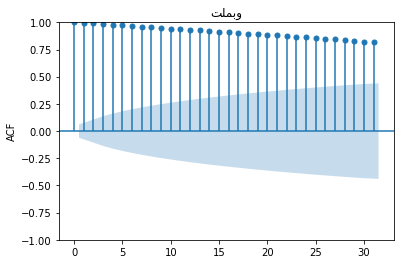

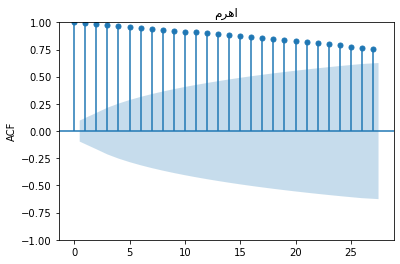

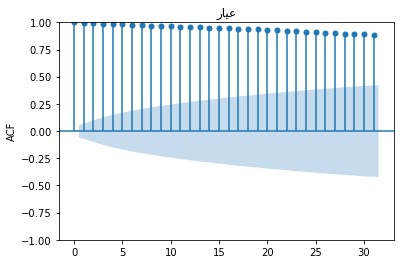

In [55]:
persian_symbols = ['وبملت', 'اهرم', 'عیار']

for symbol in persian_symbols:
    
    good_text_symbol = get_display(arabic_reshaper.reshape(symbol))

    plot_acf(get_data(symbol)[['Adj Close']])
    plt.ylabel('ACF')
    plt.title(good_text_symbol)
    
plt.show()

- Nasdaq

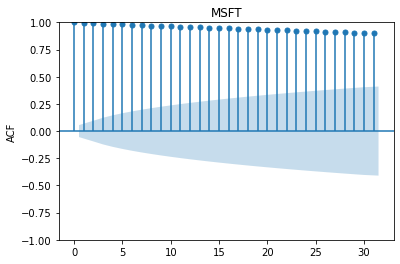

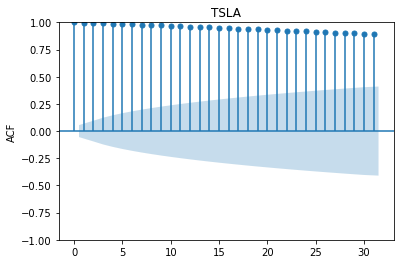

In [52]:
nasdaq_symbols = ['MSFT', 'TSLA']

for symbol in nasdaq_symbols:
    
    plot_acf(get_data(symbol, is_persian=False)[['Adj Close']])
    plt.ylabel('ACF')
    plt.title(symbol)
    
plt.show()